# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
import json

# Fetch current BTC price
# YOUR CODE HERE!
request_btc_url=requests.get(btc_url)
response_data_btc = requests.get(btc_url)
data_btc = response_data_btc.json()
btc_price= data_btc['data']['1']['quotes']['USD']['price']
print(f"The current price of BTC is {btc_price}")
# Fetch current ETH price
# YOUR CODE HERE!]
request_btc_eth=requests.get(eth_url)
response_data_eth = requests.get(eth_url)
data_eth = response_data_eth.json()
eth_price= data_eth['data']['1027']['quotes']['USD']['price']
print(f"The current price of BTC is {eth_price}")
# Compute current value of my crpto
# YOUR CODE HERE!
btc_value= my_btc*btc_price
eth_value= my_eth*eth_price
total_crypto_value= btc_value+eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value}")
print(f"The current value of your {my_eth} ETH is ${eth_value}")

The current price of BTC is 12779.05
The current price of BTC is 405.55
The current value of your 1.2 BTC is $15334.859999999999
The current value of your 5.3 ETH is $2149.415


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv("ALPACA_API_KEY")
api_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2")


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
start = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = start
).df

# Preview DataFrame
# YOUR CODE HERE!
portfolio.head()

AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.31  3933253  342.96   

                                                             
                             high     low   close    volume  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45033179

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = portfolio["AGG"]["close"][0]
spy_close_price= portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.31
Current SPY closing price: $344.63


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
agg_value= my_agg*agg_close_price
spy_value= my_spy*spy_close_price
total_shares_value= agg_value+spy_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${agg_value}")
print(f"The current value of your {my_agg} AGG shares is ${spy_value}")

The current value of your 50 SPY shares is $23462.0
The current value of your 200 AGG shares is $17231.5


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
data= [total_crypto_value,total_shares_value]
df_savings = pd.DataFrame(data, index = ['crypto','shares'], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,17484.275
shares,40693.500


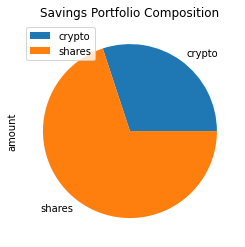

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Savings Portfolio Composition")


In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto_value + total_shares_value

# Validate saving health
# YOUR CODE HERE!
if total_savings>emergency_fund:
    print("Congratulations, you have enough money in this fund.")
elif total_savings==emergency_fund:
    print("Congratulations, you have reached your goal.")
elif total_savings<emergency_fund:
    print(f"You are ${emergency_fund-total_savings} from your goal")

Congratulations, you have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-22', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers =["AGG", "SPY"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796  206.97   

                                                              
                             high     low   close     volume  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013783,0.993087,0.995201,1.002014,1.000224,0.998443,1.002384,0.994046,1.005817,0.991388,...,1.012852,0.992918,1.001443,0.988197,1.007956,1.008206,1.002784,0.994610,0.990270,0.989879
2,1.024078,0.994409,0.991993,1.004045,0.994892,0.993421,0.997935,0.996216,1.007116,0.996632,...,1.022355,0.997297,1.001733,0.998457,1.014528,1.008570,1.006205,0.994829,0.997116,0.993961
3,1.025503,1.001314,0.993065,1.009175,0.996284,0.989477,0.992293,1.002278,1.012713,0.992252,...,1.018118,0.995732,1.002253,1.006631,1.009414,1.008765,1.002365,0.992472,1.008881,0.999956
4,1.022920,0.996186,0.991283,1.007780,0.999207,0.992897,0.989983,1.008591,1.013417,0.989102,...,1.015442,1.000431,1.007232,1.008099,1.010308,1.003508,1.001348,0.999382,1.009662,0.993741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.758901,5.955383,2.253553,4.620912,2.409856,5.828373,4.808174,2.563759,6.166444,3.205184,...,9.350034,3.527236,3.879266,4.531312,5.044886,4.009385,11.191503,3.764908,4.772784,3.429525
7557,7.768384,6.019195,2.265537,4.596314,2.424679,5.822705,4.800283,2.556618,6.147374,3.172658,...,9.301940,3.547696,3.899465,4.526015,5.038893,4.029005,11.292747,3.758217,4.757782,3.451764
7558,7.767690,6.023296,2.269202,4.556681,2.426982,5.804099,4.824447,2.545554,6.168946,3.195396,...,9.293766,3.570000,3.924976,4.532743,5.015041,4.039886,11.368597,3.739940,4.779736,3.462658
7559,7.778552,6.063420,2.271149,4.542361,2.422298,5.854300,4.823941,2.559049,6.120086,3.187414,...,9.317738,3.582190,3.889621,4.472566,5.074117,4.033839,11.332433,3.754545,4.761493,3.446507


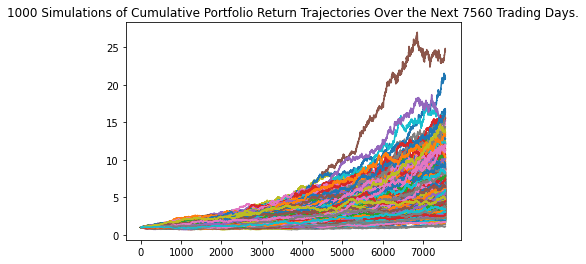

In [23]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

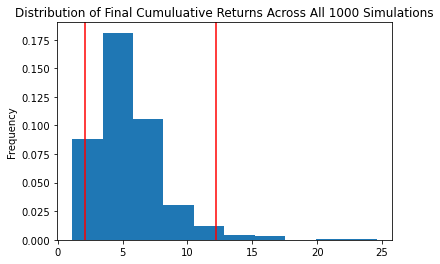

In [24]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           1000.000000
mean               5.475847
std                2.642814
min                1.113264
25%                3.636801
50%                4.976715
75%                6.637364
max               24.578639
95% CI Lower       2.065515
95% CI Upper      12.238784
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41310.29 and $244775.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*(20000*1.5),2)
ci_upper = round(tbl[9]*(20000*1.5),2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $61965.44 and $367163.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")